# Упражнение №1 Работа с геометрическими объектами

[GITHUB](https://github.com/AutoGIS-2020/Exercise-1)

В первом наборе задач (1-2) вы определите свои собственные функции для обработки геометрических объектов. Во втором наборе задач (3-4) вы будете считывать данные из файла с помощью панд и создавать геометрии на основе информации о координатах во входных данных.


#### 1. Создание базовой геометрии:

###### 1.1 Создайте функцию create_point_geom() с двумя параметрами (x_coord, y_coord). Функция должна создать фигурный точечный геометрический объект и вернуть его.

In [1]:
import os
from shapely.geometry import Point, LineString, Polygon

In [2]:
# функция проверки правильности ввода координат
def point_coordinates_check(x_coord, y_coord):
    """
        Функция проверяет корректность ввода координат
    """
    # value1 -parameter
    assert type(x_coord) in [int, float], "Входное значение для 'x_coord' должно быть целым числом или числом с плавающей запятой! Нашел: %s" % type(x_coord)

    # value2 -parameter
    assert type(y_coord) in [int, float], "Входное значение для 'y_coord' должно быть целым числом или числом с плавающей запятой! Нашел: %s" % type(y_coord)

    return 

In [3]:
# функция создающая линии
def create_point_geom(x_coord, y_coord):
    """
        Функция создаёт фигурный точечный геометрический объект и возвращает его
    """
    # проверка корректности ввода
    point_coordinates_check(x_coord, y_coord)
    
    object = Point(x_coord, y_coord)
    return object

Тип геометрии: Point
POINT (0 1.1)


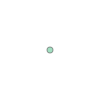

In [4]:
# Demonstrate the usage of the function create_point_geom
# point1 = create_point_geom('a', 1.1)
point1 = create_point_geom(0.0, 1.1)
print(f"Тип геометрии: {point1.geom_type}")
print(point1)
point1

###### 1.2 Создайте функцию create_line_geom (), которая принимает список объектов Shapely Point в качестве параметра points и возвращает объект LineString этих входных точек. Кроме того, вы должны позаботиться о том, чтобы функция использовалась так, как она должна:

- Внутри функции вы должны сначала проверить с помощью ``assert-functionality``, что входные данные представляют собой список (см. Урок 6 из курса Geo-Python и подсказки для этого упражнения). Если для функции передается что-то другое, чем список, вы должны вернуть сообщение об ошибке: ``"Ввод должен быть списком!"``
- Вы также должны проверить с помощью assert, что входной список содержит по крайней мере два значения. Если нет, верните сообщение об ошибке: ``"Объект LineString требует как минимум двух точек!"``
- **Необязательно:** наконец, вы должны проверить с помощью ``assert``, что все значения во входном списке действительно являются точками формы. Если нет, верните сообщение об ошибке: ``"Все значения списка должны быть стройными точечными объектами!"``

In [5]:
# функция проверки правильности ввода координат 
def points_list_check(list_points):
    """
        Функция проверяет корректность ввода координат для линии
        1. проверка является переменная списком или нет
        2. проверка корректности ввода координат
        
    """
    # проверка является переменная списком или нет
    assert type(list_points) == list, "Ввод должен быть списком!"
    
    # проверка корректности ввода координат
    for coord in list_points:
        # проверка размера и типа данных
        assert type(coord) == tuple, "Все значения списка должны быть координатными кортежами!"
        assert len(coord) == 2, "Отсутствует одна или две координаты!"
        # проверка координат
        point_coordinates_check(coord[0], coord[1])
        
    return 

In [6]:
# Проверка
list_points1 = [(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]
# list_points1 = (2.2, 4.2)
list_p = points_list_check(list_points1)

In [24]:
# функция создающая линии
def create_line_geom (list_points):
    """
        Функция создаёт фигурный линейный геометрический объект и возвращает его
        1. Проверка корректности ввода координат для линии
        2. Проверка список содержит минимум два значения
        3. Создание линии
    """
    # список точечные объекты?
    if type(list_points[0]) != tuple:
        list_points = [(p.x, p.y) for p in list_points]
    
    # проверка корректности ввода координат для линии
    points_list_check(list_points)
    
    # проверка список содержит минимум два значения
    assert len(list_points) >= 2, "Объект LineString требует как минимум двух точек!"
    
    object = LineString(list_points)
    return object

Тип геометрии: LineString
LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


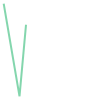

In [25]:
# Проверка
list_points1 = [(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]
# list_points1 = (2.2, 4.2)
list_p = create_line_geom(list_points1)
print(f"Тип геометрии: {list_p.geom_type}")
print(list_p)
list_p

###### Создаем объект line с двумя точками: Point(45.2, 22.34) & Point(100.22, -3.20) и сохраните результат в переменной line1:

Тип геометрии: LineString
LINESTRING (45.2 22.34, 100.22 -3.2)


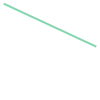

In [26]:
list_points2 = [(45.2, 22.34), (100.22, -3.20)]
line1 = create_line_geom(list_points2)
print(f"Тип геометрии: {line1.geom_type}")
print(line1)
line1

Проверьте, правильно ли ваша функция проверяет входные данные, запустив эту ячейку кода:

In [27]:
try:
    # Передайте что-нибудь еще, кроме списка
#     create_line_geom("Дай мне строчку!")
    create_line_geom([(45.2, 22.34), (100.22, -3.20)])
except AssertionError:
    print("Обнаружена ошибка утверждения. Проверка списка работает правильно.")
except Exception as e:
    raise e

###### 1.3 Создайте функцию create_poly_geom() с одним параметром coords. параметр coords должен содержать список кортежей координат. Функция должна создавать и возвращать полигональный объект на основе этих координат.

- Внутри функции вы должны сначала проверить с помощью assert-functionality, что входные данные представляют собой список (см. Урок 6 и подсказки). Если для функции передается что-то другое, чем список, вы должны вернуть сообщение об ошибке: ``"Ввод должен быть списком!"``
- Вы также должны проверить с помощью assert, что входной список содержит по крайней мере три значения. Если нет, верните сообщение об ошибке: ``"Полигональный объект требует не менее трех точек!"``
- Проверьте тип данных объектов во входном списке. Все значения во входном списке должны быть кортежами. Если нет, верните сообщение об ошибке: ``"Все значения списка должны быть координатными кортежами!"`` с помощью assert.


In [11]:
def create_poly_geom(list_points):
    """
       Функция создаёт полигональный геометрический объект и возвращает его
        1. Проверка корректности ввода координат для полигона
        2. Проверка список содержит минимум три значения
        3. Создание полигона
    """
    
    # список точечные объекты?
    if type(list_points[0]) != tuple:
        list_points = [(p.x, p.y) for p in list_points]
#         print(list_points)        
    # проверка корректности ввода координат для полигона 
    points_list_check(list_points)
    
    # проверка список содержит минимум три значения
    assert len(list_points) >= 3, "Объект LineString требует как минимум три точки!"    
    
    object = Polygon(list_points)
    return object 

Тип геометрии: Polygon
POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))


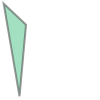

In [12]:
# создадим список координат точек
list_points1 = [(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]

# Создадим полигон
poly1 = create_poly_geom(list_points1)
print(f"Тип геометрии: {poly1.geom_type}")
print(poly1)
poly1

- **Необязательно:** разрешите также ввод, содержащий список фигурных точечных объектов. Если coords содержит список фигурных точечных объектов, верните полигон, основанный на этих точках. Если входные данные не являются ни списком кортежей, ни списком точек, верните соответствующее сообщение об ошибке с помощью assert.

###### Продемонстрируйте использование этой функции. Например, создайте полигон с тремя точками: (45.2, 22.34), (100.22, -30.20) & (70.0, 10.20).

Тип геометрии: Polygon
POLYGON ((45.2 22.34, 100.22 -30.2, 70 10.2, 45.2 22.34))


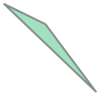

In [13]:
# создадим три точечных объекта
point1 = create_point_geom(45.2, 22.34)
point2 = create_point_geom(100.22, -30.20) 
point3 = create_point_geom(70.0, 10.20)

# создадим список точек
list_points3 = [point1, point2, point3]

# Создадим полигон
poly2 = create_poly_geom(list_points3)
print(f"Тип геометрии: {poly2.geom_type}")
print(poly2)
poly2

In [14]:
poly3 = None

In [15]:
print(poly3)

None


In [28]:
print(poly3.geom_type)

AttributeError: 'NoneType' object has no attribute 'geom_type'

###### Проверьте, правильно ли ваша функция проверяет длину входных данных, запустив эту ячейку кода:

In [ ]:
try:
    # Pass something else than a list
    create_poly_geom([(45.2, 22.34), (100.22, -30.2), (70, 10.2)])
except AssertionError:
    print("List check works")
except Exception as e:
    raise e

#### 2. Атрибуты геометрии:

##### 2.1 Cоздать функцию, называемую **get_centroid()** с одним параметром, называется **geom**. Функция должна принимать любой вид геометрического объекта Shapely в качестве входных данных и возвращать центроид этой геометрии. Кроме того, вы должны позаботиться о том, чтобы функция использовалась так, как она должна:

- Внутри функции вы должны сначала проверить с помощью **assert**, что входные данные представляют собой фигурные точки, линии или полигональную геометрию (см. [Урок 6](https://geo-python-site.readthedocs.io/en/latest/lessons/L6/overview.html) из Geo-Python Course и [подсказки](https://geo-python-site.readthedocs.io/en/latest/lessons/L6/exercise-6.html) для справки). Если для функции передается что-то другое, чем список, вы должны вернуть сообщение об ошибке: ``"Входные данные должны быть стройной геометрией!"``

In [61]:
def get_centroid(geom):
    """
    Функция принимает любой вид геометрического объекта Shapely 
    в качестве входных данных и возвращать центроид этой геометрии.
    
    Input: geom
    Output: centroid_geom
    """
    #
    centroid_geom = geom.centroid
    return centroid_geom

In [77]:
# создадим три точечных объекта
geom_point1 = create_point_geom(45.2, 22.34)
geom_point2 = create_point_geom(100.22, -30.20) 
geom_point3 = create_point_geom(70.0, 10.20)

# создадим три линии
geom_line1 = create_line_geom([geom_point1, geom_point2])
geom_line2 = create_line_geom([geom_point2, geom_point3]) 
geom_line3 = create_line_geom([geom_point3, geom_point1])

# создадим полигон из трёх точек
geom_poly1 = create_poly_geom([geom_point1, geom_point2, geom_point3])

print("Значения центроида для точек:")
print(get_centroid(geom_point1))
print(get_centroid(geom_point2))
print(get_centroid(geom_point3))
print("\n")
print("Значения центроида для линии:")
print(get_centroid(geom_line1))
print(get_centroid(geom_line2))
print(get_centroid(geom_line3))
print("\n")
print("Значения центроида для полигона:")
print(get_centroid(geom_poly1))


Значения центроида для точек:
POINT (45.2 22.34)
POINT (100.22 -30.2)
POINT (70 10.2)


Значения центроида для линии:
POINT (72.71000000000001 -3.93)
POINT (85.11 -10)
POINT (57.6 16.27)


Значения центроида для полигона:
POINT (71.80666666666667 0.78)


In [ ]:
try:
    # Pass something else than a Shapely geometry
    get_centroid("Give me a centroid!")
except AssertionError:
    print("Found and assertion error. Geometry -check works correctly.")
except Exception as e:
    raise e

##### 2.2 Создайте функцию **get_area()** с одним параметром **polygon**. Функция должна принимать полигональный объект Shapely в качестве входных данных и возвращать область этой геометрии.
- Внутри функции вы должны сначала проверить с помощью функции **assert**, что входные данные представляют собой геометрию фигурного полигона (см. Урок 6 и подсказки). Если для функции передается что-то другое, чем список, вы должны вернуть сообщение об ошибке: ``"Вход должен быть полигоном!"``

In [65]:
def get_area(polygon):
    """
    Функция принимает полигон в качестве входных данных и возвращает его площадь.
    
    Input: polygon
    Output: area_polygon
    """
    #
    area_polygon = polygon.area
    return area_polygon

In [68]:
# создадим список координат точек
list_points4 = [(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]

# Создадим полигон
poly4 = create_poly_geom(list_points4)

# Расчитаем площадь
print(f"Площадь полигона: {get_area(poly4)}")

Площадь полигона: 86.789


In [71]:
# Проверка
try:
    # Pass something else than a Shapely geometry
#     get_area("Give me an area!")
    get_area(666)
except AssertionError:
    print("Geometry -check works")
except Exception as e:
    raise e

AttributeError: 'int' object has no attribute 'area'

##### 2.3 Создайте функцию **get_length()** с параметром **geom**. Функция должна принимать в качестве входных данных либо стройную линейную строку, либо полигональный объект. Функция должна проверить тип входных данных и возвратить длину линии, если вход-LineString, и длину внешнего кольца, если вход-Polygon. Если в функцию передается что-то еще, вы должны вернуть ошибку ``"'geom' должен быть либо LineString, либо Polygon!"``. (Используйте функцию **assert**).

In [105]:
def get_length(geom):
    """
    Функция принимает полигон в качестве входных данных и возвращает его площадь.
    
    Input: geom
    Output: length_geom
    """
    # Выбор расчёта для линии и полигона
    if geom.geom_type == 'LineString':
        # линия
        length_geom = geom.length
    elif geom.geom_type == 'Polygon':
        # полигон
        length_geom = geom.exterior.length
    
    return length_geom

In [106]:
# создадим линию
list_points5 = [(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]
geom_line4 = create_line_geom(list_points4)
get_length(geom_line4)

52.46106912939557

In [107]:
# Создадим полигон
list_points5 = [(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]
geom_poly2 = create_poly_geom(list_points5)
get_length(geom_poly2)

62.16395199996553

## Документация

In [108]:
# List all functions we created
functions = [create_point_geom, create_line_geom, create_poly_geom, 
             get_centroid, get_area, get_length]

print("My funcitions:\n")

for function in functions:
    #Print function name and docstring:
    print("-", function.__name__ +":", function.__doc__)

My funcitions:

- create_point_geom: 
        Функция создаёт фигурный точечный геометрический объект и возвращает его
    
- create_line_geom: 
        Функция создаёт фигурный линейный геометрический объект и возвращает его
        1. Проверка корректности ввода координат для линии
        2. Проверка список содержит минимум два значения
        3. Создание линии
    
- create_poly_geom: 
       Функция создаёт полигональный геометрический объект и возвращает его
        1. Проверка корректности ввода координат для полигона
        2. Проверка список содержит минимум три значения
        3. Создание полигона
    
- get_centroid: 
    Функция принимает любой вид геометрического объекта Shapely 
    в качестве входных данных и возвращать центроид этой геометрии.
    
    Input: geom
    Output: centroid_geom
    
- get_area: 
    Функция принимает полигон в качестве входных данных и возвращает его площадь.
    
    Input: polygon
    Output: area_polygon
    
- get_length: 
    Функция